In [3]:
import numpy as np
import math
np.random.seed(111)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm, pyplot as plt

from hmmlearn.hmm import GaussianHMM
#import fix_yahoo_finance as yf # The library fetching the stock prices
import pickle
from sklearn.utils import check_random_state

# Task 2: Hidden Markov Model

## Task 2.1: Generate sample from GaussianHMM

In [13]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0, 0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = 0.5 * np.tile(np.ones([1,2]),(4,1))

# Build an HMM instance and set parameters
#ghmm0 = GaussianHMM(n_components=4, covariance_type='full', algorithm=algorithm0)
ghmm0 = GaussianHMM(n_components=4)

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
ghmm0.startprob_ = startprob
ghmm0.transmat_ = transmat
ghmm0.means_ = means
ghmm0.covars_ = covars
print ('covars\n', covars)

covars
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


### Task 2.1.1: Sampling from an HMM model

In [15]:
warnings.filterwarnings('ignore')
idx0 = 0

n_iter = 3
n_samples = 15
x0 = np.zeros((n_iter,n_samples,2))
z0 = np.zeros((n_iter,n_samples))
for i in  range(n_iter):
    x0[i], z0[i] = ghmm0.sample(n_samples)

print ('x0\n', x0[idx0])
print ('z0', z0[idx0])

x0
 [[-0.16848186 10.12801237]
 [-0.55687031 10.67512763]
 [-1.05147365 -0.32099545]
 [ 0.16892366 -0.41713662]
 [-0.18531897 -1.23850943]
 [ 0.34789866  0.30028859]
 [ 0.01706083 11.10839503]
 [ 8.71144231  9.9519538 ]
 [ 9.41499349 11.25687705]
 [-0.21953733 12.69330135]
 [-0.64351402 11.82751474]
 [ 0.24762349 10.89976301]
 [ 8.93983186 10.98531439]
 [ 9.76691612 -1.56509066]
 [ 0.17218648 -1.07282541]]
z0 [1. 1. 0. 0. 0. 0. 1. 2. 2. 1. 1. 1. 2. 3. 0.]


In [16]:
print ('x0\n', x0[1])
print ('z0', z0[1])

x0
 [[-2.36458178e-01 -2.16393859e-01]
 [ 1.10268020e+00 -1.27395792e-01]
 [ 1.47281643e+00 -9.08383138e-01]
 [-3.27607971e-03  6.42239503e-01]
 [-6.68418845e-01  3.82666666e-01]
 [-5.44376551e-01  1.09773592e+01]
 [-3.14364721e-01  9.44153008e+00]
 [-6.25384586e-01  2.66740077e-01]
 [ 1.12455483e+01 -1.19532803e+00]
 [ 1.17397860e+01 -1.63978923e+00]
 [ 1.14309864e+01 -1.41306035e+00]
 [-7.06773328e-01 -4.63183857e-01]
 [ 1.11895532e+01 -5.60188477e-01]
 [ 5.49338968e-01  1.76972352e-01]
 [ 4.23800582e-01  1.52316243e-01]]
z0 [0. 0. 0. 0. 0. 1. 1. 0. 3. 3. 3. 0. 3. 0. 0.]


In [17]:
print ('x0\n', x0[2])
print ('z0', z0[2])

x0
 [[ 0.23457245  0.160677  ]
 [-0.26105583 -0.72827484]
 [ 1.31592531 -1.67068609]
 [-0.21839317  1.48713214]
 [-0.16402666 -0.70312786]
 [ 0.0733407  -0.02369465]
 [ 0.36072963  0.59995614]
 [10.02987454 -0.68486892]
 [10.94658557 -1.30825047]
 [ 8.87757207  9.34549608]
 [11.54674369 -1.65859336]
 [11.15872142 -1.33970802]
 [ 9.85127866  9.73217442]
 [-1.79128833 11.46099763]
 [ 9.0029333  10.92693438]]
z0 [0. 0. 0. 0. 0. 0. 0. 3. 3. 2. 3. 3. 2. 1. 2.]


### Task 2.1.3: Posterior Probability

In [18]:
POSTERIOR0 = ghmm0.predict_proba(x0[0])
POSTERIOR0[POSTERIOR0<1e-10] = 0
print (POSTERIOR0)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


## Task 2.2: Learn another HMM from Samples

### Task 2.2.1: Choose one and fit ont it

In [19]:
ghmm1 = GaussianHMM(n_components=4, n_iter=500)
ghmm1.fit(x0[0])
print ("startprob\n",ghmm1.startprob_)
print ("transmat\n", ghmm1.transmat_)
print ("means\n",ghmm1.means_)
print ("covars\n",ghmm1.covars_)

Fitting a model with 31 free scalar parameters with only 30 data points will result in a degenerate solution.


startprob
 [2.24350515e-15 1.00000000e+00 0.00000000e+00 0.00000000e+00]
transmat
 [[6.69935664e-001 8.36962823e-035 3.30064336e-001 1.86280165e-194]
 [5.07540107e-001 4.92459893e-001 1.14652197e-010 0.00000000e+000]
 [3.90872521e-016 3.33333333e-001 3.33333333e-001 3.33333333e-001]
 [1.00000000e+000 3.89593357e-113 0.00000000e+000 0.00000000e+000]]
means
 [[-0.04510374  2.8221574 ]
 [-0.3941294  11.3334031 ]
 [ 9.02208922 10.73138175]
 [ 9.76691612 -1.56509066]]
covars
 [[[1.97961006e-01 0.00000000e+00]
  [0.00000000e+00 2.78312981e+01]]

 [[4.50669612e-02 0.00000000e+00]
  [0.00000000e+00 1.00717507e+00]]

 [[8.92138481e-02 0.00000000e+00]
  [0.00000000e+00 3.19378345e-01]]

 [[1.00000000e-02 0.00000000e+00]
  [0.00000000e+00 1.00000000e-02]]]


### Task 2.2.2: Concatenate 3 sequences

In [20]:
lengthscon = np.array([15, 15, 15])
xcon = np.concatenate([x0[0], x0[1], x0[2]])
ghmm1con = GaussianHMM(n_components=4, n_iter=500)
ghmm1con.fit(xcon, lengthscon)
print ("startprob\n",ghmm1con.startprob_)
print ("transmat\n", ghmm1con.transmat_)
print ("means\n",ghmm1con.means_)
print ("covars\n",ghmm1con.covars_)

startprob
 [6.66666667e-01 3.33333333e-01 0.00000000e+00 1.15203475e-23]
transmat
 [[7.36842105e-001 1.05263158e-001 1.57894737e-001 1.75469533e-019]
 [2.52406233e-001 4.95016626e-001 2.65939276e-100 2.52577141e-001]
 [3.33333333e-001 2.63882075e-117 4.44444444e-001 2.22222222e-001]
 [2.72626588e-015 1.64797646e-001 3.29149546e-001 5.06052808e-001]]
means
 [[ 0.1000778  -0.17721992]
 [-0.27752993 10.96900557]
 [11.00607948 -1.26276417]
 [ 7.49312997 10.52748279]]
covars
 [[[ 0.40207535  0.        ]
  [ 0.          0.5049387 ]]

 [[ 0.0822946   0.        ]
  [ 0.          0.86644574]]

 [[ 0.40305977  0.        ]
  [ 0.          0.14032571]]

 [[15.16005301  0.        ]
  [ 0.          0.58834476]]]


### Task 2.2.3: Predict states

In [21]:
z1 = ghmm0.predict(x0[0])
z2 = ghmm1.predict(x0[0])
print ('z0', z0[idx0].astype(int))
print ('z1', z1)
print ('z2', z2)

z0 [1 1 0 0 0 0 1 2 2 1 1 1 2 3 0]
z1 [1 1 0 0 0 0 1 2 2 1 1 1 2 3 0]
z2 [1 1 0 0 0 0 0 2 2 1 1 0 2 3 0]


## Task 2.3: HMM inference for real: Stock Market Prediction

In [22]:
"""
quotes = pickle.load(open('my_quotes.obj', 'rb'))
"""
try:
    with open('my_quotes.obj', 'rb') as fo:
        quotes = pickle.load(fo)
except:
    with open('my_quotes.obj', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        quotes = u.load()

In [23]:
diff_c = np.diff(quotes['Close'])

In [24]:
binom1 = np.column_stack([diff_c[:100], quotes['Volume'][1:101] / 3e7])

In [25]:
ghmm2 = GaussianHMM(n_components=3, covariance_type='diag')
ghmm2.fit(binom1)

GaussianHMM(n_components=3)

In [26]:
states = ghmm2.predict(binom1)

### Task 2.3.1: New Model for Stock

In [27]:
print ("startprob\n",ghmm2.startprob_)
print ("transmat\n", ghmm2.transmat_)
print ("means\n",ghmm2.means_)
print ("covars\n",ghmm2.covars_)

startprob
 [9.99999890e-001 1.10362498e-007 4.57924515e-103]
transmat
 [[0.85646255 0.13221778 0.01131966]
 [0.32172056 0.60081077 0.07746867]
 [0.01964908 0.8745855  0.10576542]]
means
 [[ 0.03013777  0.6358014 ]
 [ 0.02069642  0.96330058]
 [-0.88025812  1.72322572]]
covars
 [[[0.04051348 0.        ]
  [0.         0.01384327]]

 [[0.13925915 0.        ]
  [0.         0.04309787]]

 [[0.13109006 0.        ]
  [0.         0.02440315]]]


### Task 2.3.2: Visualization of States

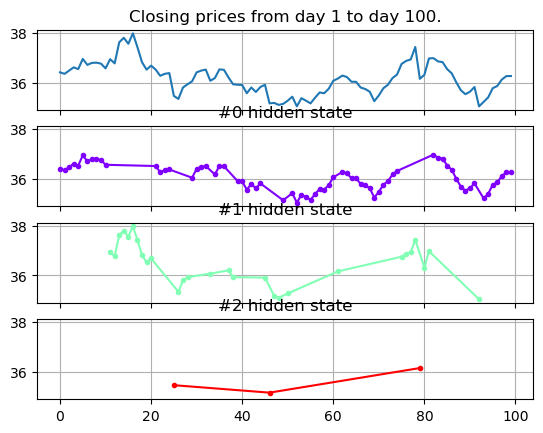

In [28]:
close_p = quotes.Close[1:101]
dates = np.arange(len(close_p))

fig, axs = plt.subplots(ghmm2.n_components+1, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, ghmm2.n_components))
axs[0].plot(dates, close_p)
axs[0].set_title("Closing prices from day 1 to day 100.")
axs[0].grid(True)
for i  in range(1,ghmm2.n_components+1):
    mask = states == i-1
    axs[i].plot(dates[mask], close_p[mask], ".-", c=colours[i-1])
    axs[i].set_title("#{0} hidden state".format(i-1))

    axs[i].grid(True)

plt.show()

### Task 2.3.3: Market Prediction

In [36]:
L=15 # We would like to predict the following 15 days' trend
Niter = 10 # A hyper parameter of generating samples

warnings.filterwarnings('ignore')
binom0 = np.column_stack([np.diff(quotes.Close), np.array(quotes.Volume)[1:]/3e7])
binom2 = np.copy(binom1)

startprob_cdf = np.cumsum(ghmm2.startprob_)
transmat_cdf = np.cumsum(ghmm2.transmat_, axis=1)
random_state = ghmm2.random_state

rs = check_random_state(None)

for l in range(L):
    binom2 = np.append(binom2,[[0,0]],axis=0) # Add a pair of empty (d,v)
    true_binom = np.copy(binom0[:len(binom1)+l])
    state_seq = ghmm2.predict(true_binom)
    previous_state = state_seq[-1]
    
    maxLL = -1e10
    for n in range(Niter):
        currstate = (transmat_cdf[previous_state]> rs.rand() ).argmax() # Go through transmat to get a new state
       
        new_sample = ghmm2._generate_sample_from_state(currstate, rs)
        tmp_binom = np.copy(true_binom)
        tmp_binom = np.append(tmp_binom,[new_sample],axis=0) # Append the new_sample for score
        tmp_maxLL = ghmm2.score(tmp_binom) # 
        if tmp_maxLL > maxLL :

                maxLL = tmp_maxLL
                binom2[-1][0] = new_sample[0]
                binom2[-1][1] = new_sample[1]

115


Text(0.5, 1.0, 'Closing Prices')

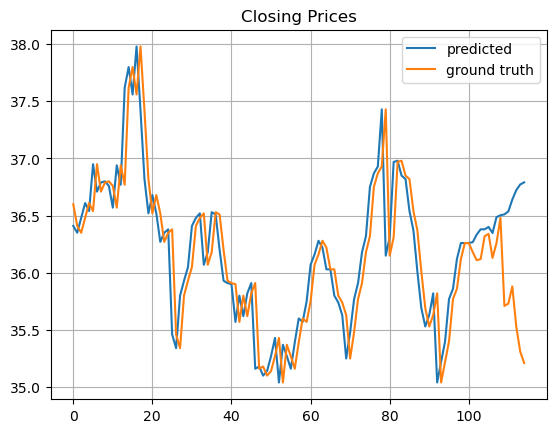

In [37]:
# The curve after day 100 is the predicted trend.

date2 = dates = np.arange(len(binom2))
print (len(date2))
plt.figure()
plt.plot(date2, quotes.Close[0]+np.cumsum(binom2[:,0]))
plt.plot(date2, quotes.Close[:len(binom1)+L])#[100:100+25])
plt.grid(True)
plt.legend(('predicted', 'ground truth'))
plt.title("Closing Prices")

Text(0.5, 1.0, 'Volume')

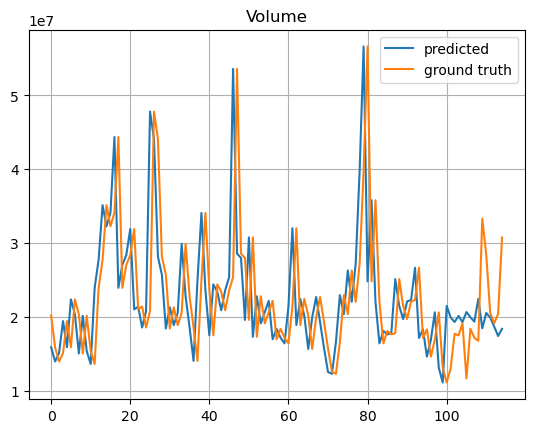

In [38]:
# The curve after day 100 is the predicted trend.

plt.figure()
plt.plot(date2, binom2[:,1]*3e7)
plt.plot(date2, quotes.Volume[0:len(binom1)+L])#[100:100+25])
plt.grid(True)
plt.legend(('predicted', 'ground truth'))
plt.title("Volume")